In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from rdkit import Chem
from rdkit.Chem import Descriptors
# pd.set_option('display.max_rows', None)

In [2]:
# h298_df = pd.read_csv('tests/data/gdb11_0.001.csv')
h298_df = pd.read_csv('tests/data/gdb11_0.01.csv')
h298_df.describe()

,h298
count,71161.000000
mean,-1.357522
std,59.770424
min,-343.774000
25%,-40.303000
50%,0.903000
75%,40.292000
max,253.086000


In [3]:
# calculate statistics for molecular weight of smiles in h298_df using Descriptors.ExactMolWt()
h298_df['MW'] = h298_df['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
h298_df['MW'].describe()

count    71161.000000
mean       150.845469
std          7.529037
min         72.021129
25%        149.120449
50%        153.078979
75%        155.131014
max        174.050379
Name: MW, dtype: float64

In [4]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.drop(columns=['hf_col_name', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'results_dir'], inplace=True)

df = df[df['split_type'] == 'random']
# df = df[df['split_type'] == 'scaffold']
# df = df[df['split_type'] == 'h298']

df['data_file'] = df['data_file'].apply(lambda x: float(x.split('/')[-1].split('_')[-1][:-4]))

df = df[df['data_file'] == 0.001]

df.sort_values(by=['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
3,2023-11-02_01-22-23.492166,delta_ml,0.001,0,0.0,0.0,0.0,random,1,False,1,2.956748,3.182947,0.997102,NaN,NaN,NaN
201,2023-11-03_22-35-45.196079,delta_ml,0.001,0,0.0,0.0,0.0,random,1,True,0,4.367652,4.915106,0.993708,NaN,NaN,NaN
412,2023-11-02_01-18-22.079904,delta_ml,0.001,0,0.0,0.0,0.0,random,1,False,2,0.952302,1.041462,0.999703,NaN,NaN,NaN
566,2023-11-03_22-35-19.156242,delta_ml,0.001,0,0.0,0.0,0.0,random,1,True,2,1.022695,1.131281,0.999649,NaN,NaN,NaN
710,2023-11-02_01-17-45.197556,delta_ml,0.001,0,0.0,0.0,0.0,random,1,False,1,2.875527,3.129421,0.997198,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,2023-11-02_02-16-52.827997,transfer,0.001,3,0.0,0.0,0.0,random,100,False,0,21.642333,28.557921,0.161932,16731.449762,37862.376025,0.849805
1320,2023-10-28_20-26-57.262791,transfer,0.001,3,0.0,0.0,0.0,random,100,True,2,44.264150,47.673801,-0.524301,20112.208168,37089.496780,0.868269
1361,2023-10-28_19-42-27.197292,transfer,0.001,3,0.0,0.0,0.0,random,100,True,0,21.611970,28.703503,0.153366,16299.569120,36297.362516,0.860608
1600,2023-10-28_20-30-58.993521,transfer,0.001,3,0.0,0.0,0.0,random,100,True,1,32.930245,45.768824,-0.794598,26811.630414,53266.878664,0.869349


In [5]:
df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & \
       (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 100) \
       & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf


In [6]:
# df[df.duplicated(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
#             'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf','seed'])]

In [7]:
# df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 1) \
#        & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

In [8]:
df_mean = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).mean().reset_index()
df_std = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).std().reset_index()

In [9]:
df_mean.model_type.value_counts()

model_type
multi_fidelity                   189
multi_fidelity_weight_sharing    189
multi_target                     189
transfer                          60
delta_ml                          20
trad_delta_ml                     20
single_fidelity                    2
Name: count, dtype: int64

In [10]:
df_mean

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
0,delta_ml,0.001,0,0.0,0.0,0.0,1,False,random,1.0,2.739889,3.026707,0.996932,NaN,NaN,NaN
1,delta_ml,0.001,0,0.0,0.0,0.0,1,True,random,1.0,2.740058,3.031848,0.996904,NaN,NaN,NaN
2,delta_ml,0.001,0,0.0,0.0,10.0,1,False,random,1.0,5.114182,6.303181,0.988784,NaN,NaN,NaN
3,delta_ml,0.001,0,0.0,0.0,10.0,1,True,random,1.0,5.079877,6.333550,0.988675,NaN,NaN,NaN
4,delta_ml,0.001,0,0.0,0.0,50.0,1,False,random,1.0,5.083655,6.382280,0.988260,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,transfer,0.001,3,0.0,0.0,0.0,1,True,random,1.0,61.137525,87.803649,-1.526828,20389.536808,41988.518507,0.865814
665,transfer,0.001,3,0.0,0.0,0.0,10,False,random,1.0,54.537730,68.922337,-0.708222,20584.741781,42616.552529,0.870505
666,transfer,0.001,3,0.0,0.0,0.0,10,True,random,1.0,57.160247,74.301995,-0.869597,19934.657153,40292.104357,0.875712
667,transfer,0.001,3,0.0,0.0,0.0,100,False,random,1.0,32.623996,40.170634,-0.349229,19865.599819,40266.030568,0.875715


In [15]:
df[df.model_type == 'single_fidelity']

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
7,2023-10-28_19-21-12.950498,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,2,7.134203,8.274577,0.981231,NaN,NaN,NaN
13,2023-10-28_19-30-54.960269,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,0,4.608907,6.170989,0.990081,NaN,NaN,NaN
20,2023-11-03_22-28-46.449600,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,0,5.182552,6.606973,0.988630,NaN,NaN,NaN
125,2023-10-28_19-02-44.264943,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,1,8.640472,9.533124,0.974000,NaN,NaN,NaN
185,2023-11-03_22-31-45.445972,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,2,8.184521,9.360231,0.975983,NaN,NaN,NaN
222,2023-10-28_19-33-08.444130,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,2,7.349854,8.474847,0.980312,NaN,NaN,NaN
288,2023-11-02_01-00-32.299864,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,0,5.525591,6.850011,0.987778,NaN,NaN,NaN
530,2023-11-02_01-50-34.998936,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,0,6.013702,7.383841,0.985799,NaN,NaN,NaN
532,2023-10-28_19-32-01.244499,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,1,9.055954,9.888452,0.972026,NaN,NaN,NaN
699,2023-10-28_19-22-19.441274,single_fidelity,0.001,0,0.0,0.0,0.0,random,1,True,2,7.635299,8.681937,0.979338,NaN,NaN,NaN


In [16]:
df_mean[df_mean.model_type == 'single_fidelity']

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
587,single_fidelity,0.001,0,0.0,0.0,0.0,1,False,random,0.000000,5.486768,6.891943,0.987628,NaN,NaN,NaN
588,single_fidelity,0.001,0,0.0,0.0,0.0,1,True,random,0.964286,6.783887,7.947879,0.982066,NaN,NaN,NaN


In [17]:
df_std[df_std.model_type == 'single_fidelity']

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
587,single_fidelity,0.001,0,0.0,0.0,0.0,1,False,random,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,single_fidelity,0.001,0,0.0,0.0,0.0,1,True,random,0.838082,1.595748,1.365866,0.006691,NaN,NaN,NaN


In [13]:
# models_colors_dict = {
#     'single_fidelity': 'k',
#     'multi_target': 'b',
#     'multi_fidelity': 'r',
#     'multi_fidelity_weight_sharing': 'g',
# }

# model_type_dict = {
#     'single_fidelity': 'Single Fidelity',
#     'multi_target': 'Multi-Target',
#     'multi_fidelity': 'Multi-Fidelity',
#     'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
# }

# for lf_hf_size_ratio in [1]:  # , 10, 100]:
#     for lf_superset_of_hf in [True]:  # , False]:
#         default_var_values = {
#             'add_pn_bias_to_make_lf': 0, 
#             'add_constant_bias_to_make_lf': 0.0, 
#             'add_gauss_noise_to_make_lf': 0.0,	
#             'add_descriptor_bias_to_make_lf': 0.0, 
#             'lf_hf_size_ratio': lf_hf_size_ratio,
#             'lf_superset_of_hf': lf_superset_of_hf,
#         }

#         for current_var in default_var_values.keys():
#             not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

#             df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
#             df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

#             # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
#             # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
#             # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

#             for model_type in [
#                 'single_fidelity',
#                 # 'multi_target', 
#                 'multi_fidelity', 
#                 'multi_fidelity_weight_sharing',
#             ]:
#                 df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
#                 df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
#                 plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]+' HF')
#                 plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
#                 if model_type != 'single_fidelity':
#                     plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
#                     plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

#             if current_var == 'lf_hf_size_ratio':
#                 plt.xscale('log')

#             if current_var == 'add_pn_bias_to_make_lf':
#                 plt.yscale('log')
            
#             plt.legend()
#             plt.xlabel(current_var)
#             plt.ylabel('MAE [kcal/mol]')

#             if current_var == 'lf_hf_size_ratio':
#                 plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
#             elif current_var == 'lf_superset_of_hf':
#                 plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
#             else:
#                 plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
#             # plt.legend(fontsize=14)
#             # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
#             # plt.ylabel('MAE [kcal/mol]', fontsize=16)
#             # plt.xticks(fontsize=14)
#             # plt.yticks(fontsize=14)
#             plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
#             plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
#             plt.show()

588    0
Name: add_pn_bias_to_make_lf, dtype: int64


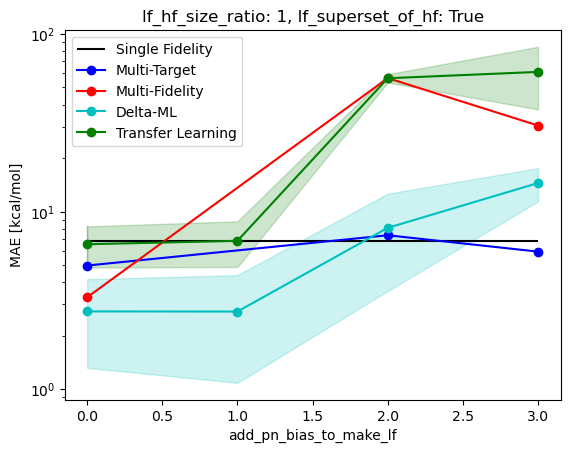

588    0.0
Name: add_constant_bias_to_make_lf, dtype: float64


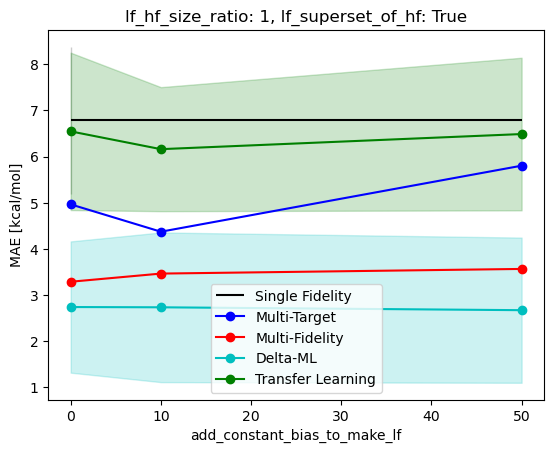

588    0.0
Name: add_gauss_noise_to_make_lf, dtype: float64


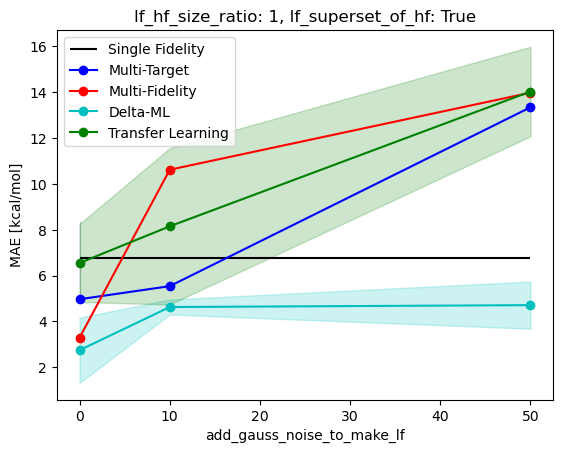

588    0.0
Name: add_descriptor_bias_to_make_lf, dtype: float64


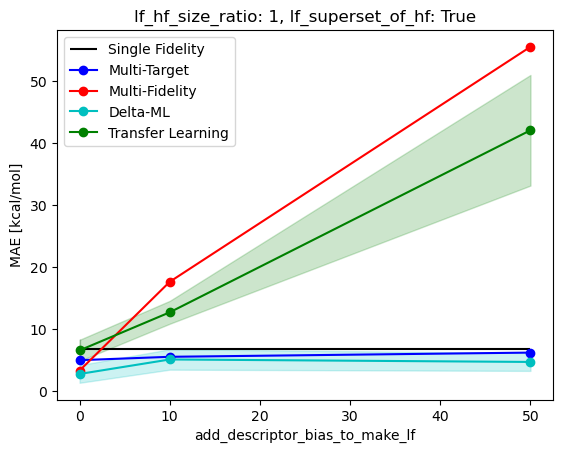

588    1
Name: lf_hf_size_ratio, dtype: int64


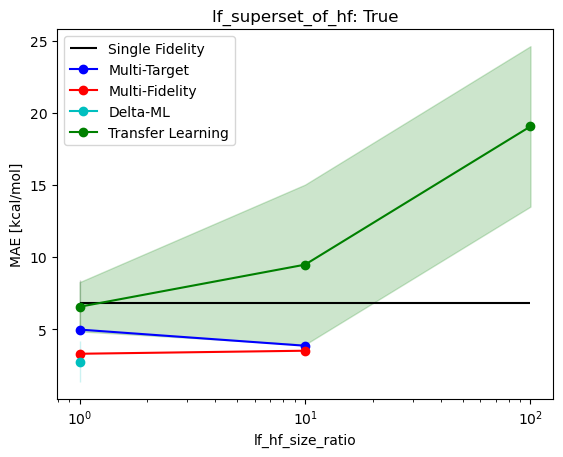

587    False
588     True
Name: lf_superset_of_hf, dtype: bool


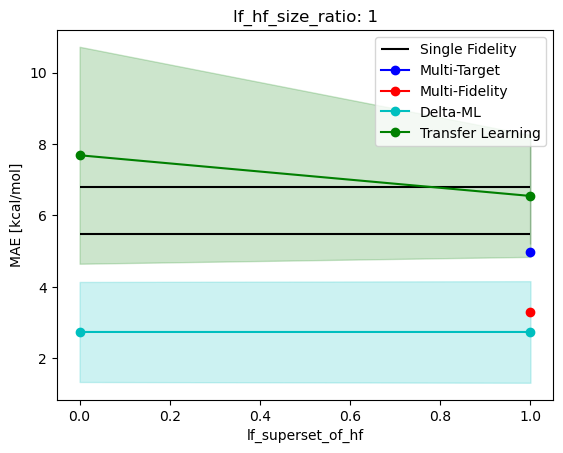

In [19]:
models_colors_dict = {
    'single_fidelity': 'k',
    'multi_target': 'b',
    'multi_fidelity': 'r',
    'delta_ml': 'c',
    'trad_delta_ml': 'm',
    'transfer': 'g',
    'multi_fidelity_weight_sharing': '',
}

model_type_dict = {
    'single_fidelity': 'Single Fidelity',
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'delta_ml': 'Delta-ML',
    'trad_delta_ml': 'Traditional Delta-ML',
    'transfer': 'Transfer Learning',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

for lf_hf_size_ratio in [1]: #, 10, 100]:
    for lf_superset_of_hf in [True]:  #, False]:
        default_var_values = {
            'add_pn_bias_to_make_lf': 0, 
            'add_constant_bias_to_make_lf': 0.0, 
            'add_gauss_noise_to_make_lf': 0.0,	
            'add_descriptor_bias_to_make_lf': 0.0, 
            'lf_hf_size_ratio': lf_hf_size_ratio,
            'lf_superset_of_hf': lf_superset_of_hf,
        }

        for current_var in default_var_values.keys():
            not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

            df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
            df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

            # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
            # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
            # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

            for model_type in [
                'single_fidelity',
                'multi_target', 
                'multi_fidelity', 
                'delta_ml',
                # 'trad_delta_ml',
                'transfer',
                # 'multi_fidelity_weight_sharing',
            ]:
                df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
                df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
                if model_type == 'single_fidelity':
                    plt.hlines(df_mean__.MAE_hf, 
                               min(df_mean_[current_var]), 
                               max(df_mean_[current_var]), 
                               models_colors_dict[model_type], 
                               label=model_type_dict[model_type])
                    plt.fill_between([min(df_mean_[current_var]), max(df_mean_[current_var])],
                                     df_mean__.MAE_hf - df_std__.MAE_hf, 
                                     df_mean__.MAE_hf + df_std__.MAE_hf, 
                                     alpha=0.2, 
                                     color=models_colors_dict[model_type])
                else:
                    plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]) #+' HF')
                    plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
                    # plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
                    # plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

            if current_var == 'lf_hf_size_ratio':
                plt.xscale('log')

            if current_var == 'add_pn_bias_to_make_lf':
                plt.yscale('log')
            
            plt.legend()
            plt.xlabel(current_var)
            plt.ylabel('MAE [kcal/mol]')

            if current_var == 'lf_hf_size_ratio':
                plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            elif current_var == 'lf_superset_of_hf':
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
            else:
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            # plt.legend(fontsize=14)
            # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
            # plt.ylabel('MAE [kcal/mol]', fontsize=16)
            # plt.xticks(fontsize=14)
            # plt.yticks(fontsize=14)
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
            plt.show()